In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import re
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec

In [80]:
data_path_nadp = "data/exp1-nadp/nadp.csv"
data_path_adp_ctr = "data/exp1-adp-ctr/adp_change_time_report.csv";
data_path_adp_dm = "data/exp1-adp-dm/adp_disable_metrics.csv";
data_path_adp_combined = "data/exp1-adp-dm-ctr/adp_disable_metrics_change_time_report.csv";
follower_id_adp_ctr = "514bbdad219c"
follower_id_adp_dm = "f4814137f2a7"
follower_id_adp_combined = "f19491742b30"
follower_id_nadp = "b77b7d44e53d"
day = "mer"
cpu_limit = 5

In [81]:
data_adp_ctr = pd.read_csv(data_path_adp_ctr, delim_whitespace=True, header=None)
data_adp_dm = pd.read_csv(data_path_adp_dm, delim_whitespace=True, header=None)
data_adp_combined = pd.read_csv(data_path_adp_combined, delim_whitespace=True, header=None)
data_nadp = pd.read_csv(data_path_nadp, delim_whitespace=True, header=None)

In [82]:
#nadp#

ts_temp_nadp = pd.DataFrame()
ts_temp_nadp[0] = (data_nadp[data_nadp[0] == day][0]).astype(str).str.replace('mer', 'Wed')
ts_temp_nadp[1] = (data_nadp[data_nadp[0] == day][1]).astype(str)
ts_temp_nadp[2] = (data_nadp[data_nadp[0] == day][2]).astype(str).str.replace('ott', 'Oct')
ts_temp_nadp[3] = (data_nadp[data_nadp[0] == day][3]).astype(str).str.replace(",", "")
ts_temp_nadp[4] = (data_nadp[data_nadp[0] == day][4]).astype(str).str.replace(",", "")
ts_temp_nadp[5] = (data_nadp[data_nadp[0] == day][5]).astype(str)

ts_nadp = pd.DataFrame(columns=["timestamp"])
ts_nadp["timestamp"] = pd.to_datetime(ts_temp_nadp[0] + " " + ts_temp_nadp[1] + " " + ts_temp_nadp[2] + " " + ts_temp_nadp[3] + " " + ts_temp_nadp[4] + " " + ts_temp_nadp[5])

# adp ctr #

ts_temp_adp_ctr = pd.DataFrame()
ts_temp_adp_ctr[0] = (data_adp_ctr[data_adp_ctr[0] == day][0]).astype(str).str.replace('mer', 'Wed')
ts_temp_adp_ctr[1] = (data_adp_ctr[data_adp_ctr[0] == day][1]).astype(str)
ts_temp_adp_ctr[2] = (data_adp_ctr[data_adp_ctr[0] == day][2]).astype(str).str.replace('ott', 'Oct')
ts_temp_adp_ctr[3] = (data_adp_ctr[data_adp_ctr[0] == day][3]).astype(str).str.replace(",", "")
ts_temp_adp_ctr[4] = (data_adp_ctr[data_adp_ctr[0] == day][4]).astype(str).str.replace(",", "")
ts_temp_adp_ctr[5] = (data_adp_ctr[data_adp_ctr[0] == day][5]).astype(str)

ts_adp_ctr = pd.DataFrame(columns=["timestamp"])
ts_adp_ctr["timestamp"] = pd.to_datetime(ts_temp_adp_ctr[0] + " " + ts_temp_adp_ctr[1] + " " + ts_temp_adp_ctr[2] + " " + ts_temp_adp_ctr[3] + " " + ts_temp_adp_ctr[4] + " " + ts_temp_adp_ctr[5])

# adp dm #

ts_temp_adp_dm = pd.DataFrame()
ts_temp_adp_dm[0] = (data_adp_dm[data_adp_dm[0] == day][0]).astype(str).str.replace('mer', 'Wed')
ts_temp_adp_dm[1] = (data_adp_dm[data_adp_dm[0] == day][1]).astype(str)
ts_temp_adp_dm[2] = (data_adp_dm[data_adp_dm[0] == day][2]).astype(str).str.replace('ott', 'Oct')
ts_temp_adp_dm[3] = (data_adp_dm[data_adp_dm[0] == day][3]).astype(str).str.replace(",", "")
ts_temp_adp_dm[4] = (data_adp_dm[data_adp_dm[0] == day][4]).astype(str).str.replace(",", "")
ts_temp_adp_dm[5] = (data_adp_dm[data_adp_dm[0] == day][5]).astype(str)

ts_adp_dm = pd.DataFrame(columns=["timestamp"])
ts_adp_dm["timestamp"] = pd.to_datetime(ts_temp_adp_dm[0] + " " + ts_temp_adp_dm[1] + " " + ts_temp_adp_dm[2] + " " + ts_temp_adp_dm[3] + " " + ts_temp_adp_dm[4] + " " + ts_temp_adp_dm[5])

# adp combined #

ts_temp_adp_combined = pd.DataFrame()
ts_temp_adp_combined[0] = (data_adp_combined[data_adp_combined[0] == day][0]).astype(str).str.replace('mer', 'Wed')
ts_temp_adp_combined[1] = (data_adp_combined[data_adp_combined[0] == day][1]).astype(str)
ts_temp_adp_combined[2] = (data_adp_combined[data_adp_combined[0] == day][2]).astype(str).str.replace('ott', 'Oct')
ts_temp_adp_combined[3] = (data_adp_combined[data_adp_combined[0] == day][3]).astype(str).str.replace(",", "")
ts_temp_adp_combined[4] = (data_adp_combined[data_adp_combined[0] == day][4]).astype(str).str.replace(",", "")
ts_temp_adp_combined[5] = (data_adp_combined[data_adp_combined[0] == day][5]).astype(str)

ts_adp_combined = pd.DataFrame(columns=["timestamp"])
ts_adp_combined["timestamp"] = pd.to_datetime(ts_temp_adp_combined[0] + " " + ts_temp_adp_combined[1] + " " + ts_temp_adp_combined[2] + " " + ts_temp_adp_combined[3] + " " + ts_temp_adp_combined[4] + " " + ts_temp_adp_combined[5])

In [83]:
# nadp #
df_nadp = pd.DataFrame(columns=["ID", "Name", "CPU%", "MEM_USAGE", "MEM_LIMIT", "MEM%", "NET_I", "NET_O", "BLOCK_I", "BLOCK_O", "PIDs", "timedelta"])
df_nadp["ID"] = data_nadp[data_nadp[0] == follower_id_nadp][0]
df_nadp["Name"] = data_nadp[data_nadp[0] == follower_id_nadp][1]
df_nadp["CPU%"] = data_nadp[data_nadp[0] == follower_id_nadp][2]
df_nadp["MEM_USAGE"] = data_nadp[data_nadp[0] == follower_id_nadp][3]
df_nadp["MEM_LIMIT"] = data_nadp[data_nadp[0] == follower_id_nadp][5]
df_nadp["MEM%"] = data_nadp[data_nadp[0] == follower_id_nadp][6]
df_nadp["NET_I"] = data_nadp[data_nadp[0] == follower_id_nadp][7]
df_nadp["NET_O"] = data_nadp[data_nadp[0] == follower_id_nadp][9]
df_nadp["BLOCK_I"] = data_nadp[data_nadp[0] == follower_id_nadp][10]
df_nadp["BLOCK_O"] = data_nadp[data_nadp[0] == follower_id_nadp][12]
df_nadp["PIDs"] = data_nadp[data_nadp[0] == follower_id_nadp][13]

# adp ctr #

df_adp_ctr = pd.DataFrame(columns=["ID", "Name", "CPU%", "MEM_USAGE", "MEM_LIMIT", "MEM%", "NET_I", "NET_O", "BLOCK_I", "BLOCK_O", "PIDs", "timedelta"])
df_adp_ctr["ID"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][0]
df_adp_ctr["Name"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][1]
df_adp_ctr["CPU%"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][2]
df_adp_ctr["MEM_USAGE"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][3]
df_adp_ctr["MEM_LIMIT"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][5]
df_adp_ctr["MEM%"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][6]
df_adp_ctr["NET_I"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][7]
df_adp_ctr["NET_O"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][9]
df_adp_ctr["BLOCK_I"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][10]
df_adp_ctr["BLOCK_O"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][12]
df_adp_ctr["PIDs"] = data_adp_ctr[data_adp_ctr[0] == follower_id_adp_ctr][13]

# adp dm #

df_adp_dm = pd.DataFrame(columns=["ID", "Name", "CPU%", "MEM_USAGE", "MEM_LIMIT", "MEM%", "NET_I", "NET_O", "BLOCK_I", "BLOCK_O", "PIDs", "timedelta"])
df_adp_dm["ID"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][0]
df_adp_dm["Name"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][1]
df_adp_dm["CPU%"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][2]
df_adp_dm["MEM_USAGE"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][3]
df_adp_dm["MEM_LIMIT"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][5]
df_adp_dm["MEM%"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][6]
df_adp_dm["NET_I"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][7]
df_adp_dm["NET_O"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][9]
df_adp_dm["BLOCK_I"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][10]
df_adp_dm["BLOCK_O"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][12]
df_adp_dm["PIDs"] = data_adp_dm[data_adp_dm[0] == follower_id_adp_dm][13]

# adp combined#

df_adp_combined = pd.DataFrame(columns=["ID", "Name", "CPU%", "MEM_USAGE", "MEM_LIMIT", "MEM%", "NET_I", "NET_O", "BLOCK_I", "BLOCK_O", "PIDs", "timedelta"])
df_adp_combined["ID"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][0]
df_adp_combined["Name"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][1]
df_adp_combined["CPU%"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][2]
df_adp_combined["MEM_USAGE"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][3]
df_adp_combined["MEM_LIMIT"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][5]
df_adp_combined["MEM%"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][6]
df_adp_combined["NET_I"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][7]
df_adp_combined["NET_O"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][9]
df_adp_combined["BLOCK_I"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][10]
df_adp_combined["BLOCK_O"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][12]
df_adp_combined["PIDs"] = data_adp_combined[data_adp_combined[0] == follower_id_adp_combined][13]

In [84]:
# reset index #
df_adp_ctr.reset_index(drop=True, inplace=True)
df_adp_dm.reset_index(drop=True, inplace=True)
df_adp_combined.reset_index(drop=True, inplace=True)
df_nadp.reset_index(drop=True, inplace=True)
ts_adp_ctr.reset_index(drop=True, inplace=True)
ts_adp_dm.reset_index(drop=True, inplace=True)
ts_adp_combined.reset_index(drop=True, inplace=True)
ts_nadp.reset_index(drop=True, inplace=True)

In [85]:
df_adp_ctr["timestamp"] = ts_adp_ctr["timestamp"]
df_adp_dm["timestamp"] = ts_adp_dm["timestamp"]
df_adp_combined["timestamp"] = ts_adp_combined["timestamp"]
df_nadp["timestamp"] = ts_nadp["timestamp"]

df_adp_ctr = df_adp_ctr[df_adp_ctr["timestamp"] < df_adp_ctr["timestamp"][0] + pd.to_timedelta(1801, unit='s')]
df_adp_dm = df_adp_dm[df_adp_dm["timestamp"] < df_adp_dm["timestamp"][0] + pd.to_timedelta(1801, unit='s')]
df_adp_combined = df_adp_combined[df_adp_combined["timestamp"] < df_adp_combined["timestamp"][0] + pd.to_timedelta(1801, unit='s')]
df_nadp = df_nadp[df_nadp["timestamp"] < df_nadp["timestamp"][0] + pd.to_timedelta(1801, unit='s')]

In [86]:
# set timestamp #

# adp ctr #
time_0_adp_ctr = ts_adp_ctr["timestamp"][0]
ls_adp_ctr = []
for idx, row in ts_adp_ctr.iterrows():
    ls_adp_ctr.append(pd.Timedelta(row["timestamp"] - time_0_adp_ctr))
ts_adp_ctr["timedelta"] = ls_adp_ctr

# adp dm #
time_0_adp_dm = ts_adp_dm["timestamp"][0]
ls_adp_dm = []
for idx, row in ts_adp_dm.iterrows():
    ls_adp_dm.append(pd.Timedelta(row["timestamp"] - time_0_adp_dm))
ts_adp_dm["timedelta"] = ls_adp_dm

# adp combined #
time_0_adp_combined = ts_adp_combined["timestamp"][0]
ls_adp_combined = []
for idx, row in ts_adp_combined.iterrows():
    ls_adp_combined.append(pd.Timedelta(row["timestamp"] - time_0_adp_combined))
ts_adp_combined["timedelta"] = ls_adp_combined

# nadp #
time_0_nadp = ts_nadp["timestamp"][0]
ls_nadp = []
for idx, row in ts_nadp.iterrows():
    ls_nadp.append(pd.Timedelta(row["timestamp"] - time_0_nadp))
ts_nadp["timedelta"] = ls_nadp

In [87]:
df_adp_ctr["timedelta"] = ts_adp_ctr["timedelta"].dt.seconds
df_adp_dm["timedelta"] = ts_adp_dm["timedelta"].dt.seconds
df_adp_combined["timedelta"] = ts_adp_combined["timedelta"].dt.seconds
df_nadp["timedelta"] = ts_nadp["timedelta"].dt.seconds

df_adp_ctr["timedelta"] = pd.to_datetime(df_adp_ctr['timedelta'], unit='s')
df_adp_dm["timedelta"] = pd.to_datetime(df_adp_dm['timedelta'], unit='s')
df_adp_combined["timedelta"] = pd.to_datetime(df_adp_combined['timedelta'], unit='s')
df_nadp["timedelta"] = pd.to_datetime(df_nadp['timedelta'], unit='s')

In [88]:
# adp ctr #
df_adp_ctr['CPU%'] = df_adp_ctr['CPU%'].str.replace('%','')
df_adp_ctr['MEM%'] = df_adp_ctr['MEM%'].str.replace('%','')
df_adp_ctr["CPU%"] = df_adp_ctr["CPU%"].astype(float)
df_adp_ctr["MEM%"] = df_adp_ctr["MEM%"].astype(float)

# adp dm #
df_adp_dm['CPU%'] = df_adp_dm['CPU%'].str.replace('%','')
df_adp_dm['MEM%'] = df_adp_dm['MEM%'].str.replace('%','')
df_adp_dm["CPU%"] = df_adp_dm["CPU%"].astype(float)
df_adp_dm["MEM%"] = df_adp_dm["MEM%"].astype(float)

# adp combined #
df_adp_combined['CPU%'] = df_adp_combined['CPU%'].str.replace('%','')
df_adp_combined['MEM%'] = df_adp_combined['MEM%'].str.replace('%','')
df_adp_combined["CPU%"] = df_adp_combined["CPU%"].astype(float)
df_adp_combined["MEM%"] = df_adp_combined["MEM%"].astype(float)

# nadp #
df_nadp['CPU%'] = df_nadp['CPU%'].str.replace('%','')
df_nadp['MEM%'] = df_nadp['MEM%'].str.replace('%','')
df_nadp["CPU%"] = df_nadp["CPU%"].astype(float)
df_nadp["MEM%"] = df_nadp["MEM%"].astype(float)

In [89]:
# adp ctr #
values_net_i = []
um_net_i = []
for s in df_adp_ctr["NET_I"]:
    values_net_i.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_i.append(re.findall("[a-zA-Z]+", s)[0])

values_net_o = []
um_net_o = []
for s in df_adp_ctr["NET_O"]:
    values_net_o.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_o.append(re.findall("[a-zA-Z]+", s)[0])
    
values_mem_usage = []
um_mem_usage = []
for s in df_adp_ctr["MEM_USAGE"]:
    values_mem_usage.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_usage.append(re.findall("[a-zA-Z]+", s)[0])

values_mem_limit = []
um_mem_limit = []
for s in df_adp_ctr["MEM_LIMIT"]:
    values_mem_limit.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_limit.append(re.findall("[a-zA-Z]+", s)[0])

df_adp_ctr["NET_I_values"] = values_net_i
df_adp_ctr["NET_I_um"] = um_net_i
df_adp_ctr["NET_O_values"] = values_net_o
df_adp_ctr["NET_O_um"] = um_net_o
df_adp_ctr["MEM_USAGE_values"] = values_mem_usage
df_adp_ctr["MEM_USAGE_um"] = um_mem_usage
df_adp_ctr["MEM_LIMIT_values"] = values_mem_limit
df_adp_ctr["MEM_LIMIT_um"] = um_mem_limit

df_adp_ctr["NET_I_values"] = df_adp_ctr["NET_I_values"].astype(float)
df_adp_ctr["NET_O_values"] = df_adp_ctr["NET_O_values"].astype(float)
df_adp_ctr["MEM_USAGE_values"] = df_adp_ctr["MEM_USAGE_values"].astype(float)
df_adp_ctr["MEM_LIMIT_values"] = df_adp_ctr["MEM_LIMIT_values"].astype(float)

# adp dm #
values_net_i = []
um_net_i = []
for s in df_adp_dm["NET_I"]:
    values_net_i.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_i.append(re.findall("[a-zA-Z]+", s)[0])

values_net_o = []
um_net_o = []
for s in df_adp_dm["NET_O"]:
    values_net_o.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_o.append(re.findall("[a-zA-Z]+", s)[0])
    
values_mem_usage = []
um_mem_usage = []
for s in df_adp_dm["MEM_USAGE"]:
    values_mem_usage.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_usage.append(re.findall("[a-zA-Z]+", s)[0])

values_mem_limit = []
um_mem_limit = []
for s in df_adp_dm["MEM_LIMIT"]:
    values_mem_limit.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_limit.append(re.findall("[a-zA-Z]+", s)[0])

df_adp_dm["NET_I_values"] = values_net_i
df_adp_dm["NET_I_um"] = um_net_i
df_adp_dm["NET_O_values"] = values_net_o
df_adp_dm["NET_O_um"] = um_net_o
df_adp_dm["MEM_USAGE_values"] = values_mem_usage
df_adp_dm["MEM_USAGE_um"] = um_mem_usage
df_adp_dm["MEM_LIMIT_values"] = values_mem_limit
df_adp_dm["MEM_LIMIT_um"] = um_mem_limit

df_adp_dm["NET_I_values"] = df_adp_dm["NET_I_values"].astype(float)
df_adp_dm["NET_O_values"] = df_adp_dm["NET_O_values"].astype(float)
df_adp_dm["MEM_USAGE_values"] = df_adp_dm["MEM_USAGE_values"].astype(float)
df_adp_dm["MEM_LIMIT_values"] = df_adp_dm["MEM_LIMIT_values"].astype(float)

# adp combined #
values_net_i = []
um_net_i = []
for s in df_adp_combined["NET_I"]:
    values_net_i.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_i.append(re.findall("[a-zA-Z]+", s)[0])

values_net_o = []
um_net_o = []
for s in df_adp_combined["NET_O"]:
    values_net_o.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_o.append(re.findall("[a-zA-Z]+", s)[0])
    
values_mem_usage = []
um_mem_usage = []
for s in df_adp_combined["MEM_USAGE"]:
    values_mem_usage.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_usage.append(re.findall("[a-zA-Z]+", s)[0])

values_mem_limit = []
um_mem_limit = []
for s in df_adp_combined["MEM_LIMIT"]:
    values_mem_limit.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_limit.append(re.findall("[a-zA-Z]+", s)[0])

df_adp_combined["NET_I_values"] = values_net_i
df_adp_combined["NET_I_um"] = um_net_i
df_adp_combined["NET_O_values"] = values_net_o
df_adp_combined["NET_O_um"] = um_net_o
df_adp_combined["MEM_USAGE_values"] = values_mem_usage
df_adp_combined["MEM_USAGE_um"] = um_mem_usage
df_adp_combined["MEM_LIMIT_values"] = values_mem_limit
df_adp_combined["MEM_LIMIT_um"] = um_mem_limit

df_adp_combined["NET_I_values"] = df_adp_combined["NET_I_values"].astype(float)
df_adp_combined["NET_O_values"] = df_adp_combined["NET_O_values"].astype(float)
df_adp_combined["MEM_USAGE_values"] = df_adp_combined["MEM_USAGE_values"].astype(float)
df_adp_combined["MEM_LIMIT_values"] = df_adp_combined["MEM_LIMIT_values"].astype(float)


# nadp #

values_net_i = []
um_net_i = []
for s in df_nadp["NET_I"]:
    values_net_i.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_i.append(re.findall("[a-zA-Z]+", s)[0])

values_net_o = []
um_net_o = []
for s in df_nadp["NET_O"]:
    values_net_o.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_net_o.append(re.findall("[a-zA-Z]+", s)[0])
    
values_mem_usage = []
um_mem_usage = []
for s in df_nadp["MEM_USAGE"]:
    values_mem_usage.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_usage.append(re.findall("[a-zA-Z]+", s)[0])

values_mem_limit = []
um_mem_limit = []
for s in df_nadp["MEM_LIMIT"]:
    values_mem_limit.append(float(re.findall("\d*\.?\d+", s)[0]))
    um_mem_limit.append(re.findall("[a-zA-Z]+", s)[0])

df_nadp["NET_I_values"] = values_net_i
df_nadp["NET_I_um"] = um_net_i
df_nadp["NET_O_values"] = values_net_o
df_nadp["NET_O_um"] = um_net_o
df_nadp["MEM_USAGE_values"] = values_mem_usage
df_nadp["MEM_USAGE_um"] = um_mem_usage
df_nadp["MEM_LIMIT_values"] = values_mem_limit
df_nadp["MEM_LIMIT_um"] = um_mem_limit

df_nadp["NET_I_values"] = df_nadp["NET_I_values"].astype(float)
df_nadp["NET_O_values"] = df_nadp["NET_O_values"].astype(float)
df_nadp["MEM_USAGE_values"] = df_nadp["MEM_USAGE_values"].astype(float)
df_nadp["MEM_LIMIT_values"] = df_nadp["MEM_LIMIT_values"].astype(float)

In [90]:
vals_MB = {'kB': 0.001, 'MB':1, 'MiB':1.049, 'GB':1000, 'GiB':1024}

df_adp_ctr["NET_I (MB)"] = df_adp_ctr["NET_I_values"]*df_adp_ctr["NET_I_um"].map(vals_MB)
df_adp_ctr["NET_O (MB)"] = df_adp_ctr["NET_O_values"]*df_adp_ctr["NET_O_um"].map(vals_MB)
df_adp_ctr["MEM_USAGE (MB)"] = df_adp_ctr["MEM_USAGE_values"]*df_adp_ctr["MEM_USAGE_um"].map(vals_MB)
df_adp_ctr["MEM_LIMIT (MB)"] = df_adp_ctr["MEM_LIMIT_values"]*df_adp_ctr["MEM_LIMIT_um"].map(vals_MB)

df_adp_dm["NET_I (MB)"] = df_adp_dm["NET_I_values"]*df_adp_dm["NET_I_um"].map(vals_MB)
df_adp_dm["NET_O (MB)"] = df_adp_dm["NET_O_values"]*df_adp_dm["NET_O_um"].map(vals_MB)
df_adp_dm["MEM_USAGE (MB)"] = df_adp_dm["MEM_USAGE_values"]*df_adp_dm["MEM_USAGE_um"].map(vals_MB)
df_adp_dm["MEM_LIMIT (MB)"] = df_adp_dm["MEM_LIMIT_values"]*df_adp_dm["MEM_LIMIT_um"].map(vals_MB)

df_adp_combined["NET_I (MB)"] = df_adp_combined["NET_I_values"]*df_adp_combined["NET_I_um"].map(vals_MB)
df_adp_combined["NET_O (MB)"] = df_adp_combined["NET_O_values"]*df_adp_combined["NET_O_um"].map(vals_MB)
df_adp_combined["MEM_USAGE (MB)"] = df_adp_combined["MEM_USAGE_values"]*df_adp_combined["MEM_USAGE_um"].map(vals_MB)
df_adp_combined["MEM_LIMIT (MB)"] = df_adp_combined["MEM_LIMIT_values"]*df_adp_combined["MEM_LIMIT_um"].map(vals_MB)

df_nadp["NET_I (MB)"] = df_nadp["NET_I_values"]*df_nadp["NET_I_um"].map(vals_MB)
df_nadp["NET_O (MB)"] = df_nadp["NET_O_values"]*df_nadp["NET_O_um"].map(vals_MB)
df_nadp["MEM_USAGE (MB)"] = df_nadp["MEM_USAGE_values"]*df_nadp["MEM_USAGE_um"].map(vals_MB)
df_nadp["MEM_LIMIT (MB)"] = df_nadp["MEM_LIMIT_values"]*df_nadp["MEM_LIMIT_um"].map(vals_MB)

In [91]:
df_adp_ctr["CPU_LIMIT"] = cpu_limit
df_adp_dm["CPU_LIMIT"] = cpu_limit
df_adp_combined["CPU_LIMIT"] = cpu_limit
df_nadp["CPU_LIMIT"] = cpu_limit

In [92]:
df_adp_ctr["CPU_scaled%"] = (df_adp_ctr["CPU%"]*100)/df_adp_ctr["CPU_LIMIT"]
df_adp_dm["CPU_scaled%"] = (df_adp_dm["CPU%"]*100)/df_adp_dm["CPU_LIMIT"]
df_adp_combined["CPU_scaled%"] = (df_adp_combined["CPU%"]*100)/df_adp_combined["CPU_LIMIT"]
df_nadp["CPU_scaled%"] = (df_nadp["CPU%"]*100)/df_nadp["CPU_LIMIT"]

In [93]:
df_cpu = pd.DataFrame(columns=["nadp", "adp_ctr", "adp_dm", "adp_combined"])
df_cpu["nadp"] = df_nadp["CPU_scaled%"]
df_cpu["adp_ctr"] = df_adp_ctr["CPU_scaled%"]
df_cpu["adp_dm"] = df_adp_dm["CPU_scaled%"]
df_cpu["adp_combined"] = df_adp_combined["CPU_scaled%"]

df_mem = pd.DataFrame(columns=["nadp", "adp_ctr", "adp_dm", "adp_combined"])
df_mem["nadp"] = df_nadp["MEM%"]
df_mem["adp_ctr"] = df_adp_ctr["MEM%"]
df_mem["adp_dm"] = df_adp_dm["MEM%"]
df_mem["adp_combined"] = df_adp_combined["MEM%"]


df_pids = pd.DataFrame(columns=["nadp", "adp_ctr", "adp_dm", "adp_combined"])
df_pids["nadp"] = df_nadp["PIDs"]
df_pids["adp_ctr"] = df_adp_ctr["PIDs"]
df_pids["adp_dm"] = df_adp_dm["PIDs"]
df_pids["adp_combined"] = df_adp_combined["PIDs"]

df_netio = pd.DataFrame(columns=["nadp_i", "nadp_o", "adp_ctr_i", "adp_ctr_o", "adp_dm_i", "adp_dm_o", "adp_combined_i", "adp_combined_o"])
df_netio["nadp_i"] = df_nadp["NET_I (MB)"]
df_netio["nadp_o"] = df_nadp["NET_O (MB)"]

df_netio["adp_ctr_i"] = df_adp_ctr["NET_I (MB)"]
df_netio["adp_ctr_o"] = df_adp_ctr["NET_O (MB)"]

df_netio["adp_dm_i"] = df_adp_dm["NET_I (MB)"]
df_netio["adp_dm_o"] = df_adp_dm["NET_O (MB)"]

df_netio["adp_combined_i"] = df_adp_combined["NET_I (MB)"]
df_netio["adp_combined_o"] = df_adp_combined["NET_O (MB)"]

In [94]:
# lines to skip from CSV
skiprows = [i for i in range(0,86)]
skiprows.extend([i for i in range(186,266)])

path_nadp = "data/exp1-nadp/"
path_adp_ctr = "data/exp1-adp-ctr/"
path_adp_dm = "data/exp1-adp-dm/"
path_adp_combined = "data/exp1-adp-dm-ctr/"
li_nadp = []
li_adp_ctr = []
li_adp_dm = []
li_adp_combined = []

for i in range(1,51):
    filename = path_nadp + "powertop-" + str(i) + "-nadp.csv"
    df_nadp_battery = pd.read_csv(filename, index_col=None, header=None, skiprows=skiprows, sep=";")
    df_nadp_battery["time"] = i;
    li_nadp.append(df_nadp_battery)
    
    filename = path_adp_ctr + "powertop-" + str(i) + "-adp_change_time_report.csv"
    df_adp_ctr_battery = pd.read_csv(filename, index_col=None, header=None, skiprows=skiprows, sep=";")
    df_adp_ctr_battery["time"] = i;
    li_adp_ctr.append(df_adp_ctr_battery)
    
    filename = path_adp_dm + "powertop-" + str(i) + "-adp_disable_metrics.csv"
    df_adp_dm_battery = pd.read_csv(filename, index_col=None, header=None, skiprows=skiprows, sep=";")
    df_adp_dm_battery["time"] = i;
    li_adp_dm.append(df_adp_dm_battery)
    
    filename = path_adp_combined + "powertop-" + str(i) + "-adp_disable_metrics_change_time_report.csv"
    df_adp_combined_battery = pd.read_csv(filename, index_col=None, header=None, skiprows=skiprows, sep=";")
    df_adp_combined_battery["time"] = i;
    li_adp_combined.append(df_adp_combined_battery)
    
df_nadp_battery = pd.concat(li_nadp, axis=0, ignore_index=True)
df_adp_ctr_battery = pd.concat(li_adp_ctr, axis=0, ignore_index=True)
df_adp_dm_battery = pd.concat(li_adp_dm, axis=0, ignore_index=True)
df_adp_combined_battery = pd.concat(li_adp_combined, axis=0, ignore_index=True)

df_nadp_battery.columns = ["Usage", "Wakeups/s", "GPU ops/s", "Disk IO/s", "GFX Wakeups/s", "Category", "Description", "PW Estimate", "time"]
df_adp_ctr_battery.columns = ["Usage", "Wakeups/s", "GPU ops/s", "Disk IO/s", "GFX Wakeups/s", "Category", "Description", "PW Estimate", "time"]
df_adp_dm_battery.columns = ["Usage", "Wakeups/s", "GPU ops/s", "Disk IO/s", "GFX Wakeups/s", "Category", "Description", "PW Estimate", "time"]
df_adp_combined_battery.columns = ["Usage", "Wakeups/s", "GPU ops/s", "Disk IO/s", "GFX Wakeups/s", "Category", "Description", "PW Estimate", "time"]

# PW Estimate #

# nadp #
values = df_nadp_battery["PW Estimate"].str.split().str[0]
um = df_nadp_battery["PW Estimate"].str.split().str[-1]

df_nadp_battery["PW_Estimate_Values"] = values.str.replace(',', '.').astype(float)
df_nadp_battery["PW_Estimate_UM"] = um

# adp ctr #
values = df_adp_ctr_battery["PW Estimate"].str.split().str[0]
um = df_adp_ctr_battery["PW Estimate"].str.split().str[-1]

df_adp_ctr_battery["PW_Estimate_Values"] = values.str.replace(',', '.').astype(float)
df_adp_ctr_battery["PW_Estimate_UM"] = um

# adp dm #
values = df_adp_dm_battery["PW Estimate"].str.split().str[0]
um = df_adp_dm_battery["PW Estimate"].str.split().str[-1]

df_adp_dm_battery["PW_Estimate_Values"] = values.str.replace(',', '.').astype(float)
df_adp_dm_battery["PW_Estimate_UM"] = um

# adp combined #
values = df_adp_combined_battery["PW Estimate"].str.split().str[0]
um = df_adp_combined_battery["PW Estimate"].str.split().str[-1]

df_adp_combined_battery["PW_Estimate_Values"] = values.str.replace(',', '.').astype(float)
df_adp_combined_battery["PW_Estimate_UM"] = um

vals_watt = {'W': 1000, 'mW':1, 'uW':0.001}

df_nadp_battery["PW Estimate (mW)"] = df_nadp_battery["PW_Estimate_Values"]*df_nadp_battery["PW_Estimate_UM"].map(vals_watt)
df_adp_ctr_battery["PW Estimate (mW)"] = df_adp_ctr_battery["PW_Estimate_Values"]*df_adp_ctr_battery["PW_Estimate_UM"].map(vals_watt)
df_adp_dm_battery["PW Estimate (mW)"] = df_adp_dm_battery["PW_Estimate_Values"]*df_adp_dm_battery["PW_Estimate_UM"].map(vals_watt)
df_adp_combined_battery["PW Estimate (mW)"] = df_adp_combined_battery["PW_Estimate_Values"]*df_adp_combined_battery["PW_Estimate_UM"].map(vals_watt)

# drop unuseful columns
df_nadp_battery = df_nadp_battery.drop('PW Estimate', 1)
df_nadp_battery = df_nadp_battery.drop('PW_Estimate_Values', 1)
df_nadp_battery = df_nadp_battery.drop('PW_Estimate_UM', 1)
df_nadp_battery = df_nadp_battery.drop('Usage', 1)
df_nadp_battery = df_nadp_battery.drop('GPU ops/s', 1)
df_nadp_battery = df_nadp_battery.drop('Disk IO/s', 1)
df_nadp_battery = df_nadp_battery.drop('GFX Wakeups/s', 1)

df_adp_ctr_battery = df_adp_ctr_battery.drop('PW Estimate', 1)
df_adp_ctr_battery = df_adp_ctr_battery.drop('PW_Estimate_Values', 1)
df_adp_ctr_battery = df_adp_ctr_battery.drop('PW_Estimate_UM', 1)
df_adp_ctr_battery = df_adp_ctr_battery.drop('Usage', 1)
df_adp_ctr_battery = df_adp_ctr_battery.drop('GPU ops/s', 1)
df_adp_ctr_battery = df_adp_ctr_battery.drop('Disk IO/s', 1)
df_adp_ctr_battery = df_adp_ctr_battery.drop('GFX Wakeups/s', 1)

df_adp_dm_battery = df_adp_dm_battery.drop('PW Estimate', 1)
df_adp_dm_battery = df_adp_dm_battery.drop('PW_Estimate_Values', 1)
df_adp_dm_battery = df_adp_dm_battery.drop('PW_Estimate_UM', 1)
df_adp_dm_battery = df_adp_dm_battery.drop('Usage', 1)
df_adp_dm_battery = df_adp_dm_battery.drop('GPU ops/s', 1)
df_adp_dm_battery = df_adp_dm_battery.drop('Disk IO/s', 1)
df_adp_dm_battery = df_adp_dm_battery.drop('GFX Wakeups/s', 1)

df_adp_combined_battery = df_adp_combined_battery.drop('PW Estimate', 1)
df_adp_combined_battery = df_adp_combined_battery.drop('PW_Estimate_Values', 1)
df_adp_combined_battery = df_adp_combined_battery.drop('PW_Estimate_UM', 1)
df_adp_combined_battery = df_adp_combined_battery.drop('Usage', 1)
df_adp_combined_battery = df_adp_combined_battery.drop('GPU ops/s', 1)
df_adp_combined_battery = df_adp_combined_battery.drop('Disk IO/s', 1)
df_adp_combined_battery = df_adp_combined_battery.drop('GFX Wakeups/s', 1)

df_nadp_battery = df_nadp_battery[df_nadp_battery["Description"].str.contains("FogMon -C")]
df_adp_ctr_battery = df_adp_ctr_battery[df_adp_ctr_battery["Description"].str.contains("FogMon -C")]
df_adp_dm_battery = df_adp_dm_battery[df_adp_dm_battery["Description"].str.contains("FogMon -C")]
df_adp_combined_battery = df_adp_combined_battery[df_adp_combined_battery["Description"].str.contains("FogMon -C")]

temp_nadp_battery = pd.DataFrame(columns=["time", "PW Estimate (mW)"])
temp_nadp_battery["time"] = df_nadp_battery["time"]
temp_nadp_battery["PW Estimate (mW)"] = df_nadp_battery["PW Estimate (mW)"]

temp_adp_ctr_battery = pd.DataFrame(columns=["time", "PW Estimate (mW)"])
temp_adp_ctr_battery["time"] = df_adp_ctr_battery["time"]
temp_adp_ctr_battery["PW Estimate (mW)"] = df_adp_ctr_battery["PW Estimate (mW)"]

temp_adp_dm_battery = pd.DataFrame(columns=["time", "PW Estimate (mW)"])
temp_adp_dm_battery["time"] = df_adp_dm_battery["time"]
temp_adp_dm_battery["PW Estimate (mW)"] = df_adp_dm_battery["PW Estimate (mW)"]

temp_adp_combined_battery = pd.DataFrame(columns=["time", "PW Estimate (mW)"])
temp_adp_combined_battery["time"] = df_adp_combined_battery["time"]
temp_adp_combined_battery["PW Estimate (mW)"] = df_adp_combined_battery["PW Estimate (mW)"]

grouped_df_nadp_battery = temp_nadp_battery.groupby("time")
mean_df_nadp_battery = grouped_df_nadp_battery.mean()
mean_df_nadp_battery = mean_df_nadp_battery.reset_index()

grouped_df_adp_ctr_battery = temp_adp_ctr_battery.groupby("time")
mean_df_adp_ctr_battery = grouped_df_adp_ctr_battery.mean()
mean_df_adp_ctr_battery = mean_df_adp_ctr_battery.reset_index()

grouped_df_adp_dm_battery = temp_adp_dm_battery.groupby("time")
mean_df_adp_dm_battery = grouped_df_adp_dm_battery.mean()
mean_df_adp_dm_battery = mean_df_adp_dm_battery.reset_index()

grouped_df_adp_combined_battery = temp_adp_combined_battery.groupby("time")
mean_df_adp_combined_battery = grouped_df_adp_combined_battery.mean()
mean_df_adp_combined_battery = mean_df_adp_combined_battery.reset_index()

df_battery = pd.DataFrame(columns=["nadp", "adp_ctr", "adp_dm", "adp_combined"])
df_battery["nadp"] = mean_df_nadp_battery["PW Estimate (mW)"]
df_battery["adp_ctr"] = mean_df_adp_ctr_battery["PW Estimate (mW)"]
df_battery["adp_dm"] = mean_df_adp_dm_battery["PW Estimate (mW)"]
df_battery["adp_combined"] = mean_df_adp_combined_battery["PW Estimate (mW)"]

In [95]:
sns.set()
sns.set_style("whitegrid")

<ipython-input-96-59664325ef29>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Baseline', 'Adaptive CTR', 'Adaptive DM', 'Adaptive Combined'], rotation=90, fontsize=13)
<ipython-input-96-59664325ef29>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Baseline', 'Adaptive CTR', 'Adaptive DM', 'Adaptive Combined'], rotation=90, fontsize=13)
<ipython-input-96-59664325ef29>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['Baseline', 'Adaptive CTR', 'Adaptive DM', 'Adaptive Combined'], rotation=90, fontsize=13)
<ipython-input-96-59664325ef29>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['Baseline I', 'Baseline O', 'Adaptive CTR I', 'Adaptive CTR O', 'Adaptive DM I', 'Adaptive DM O', 'Adaptive Combined I', 'Adaptive Combined O'], rotation=90, fontsize=13)
<ipython-input-96-59

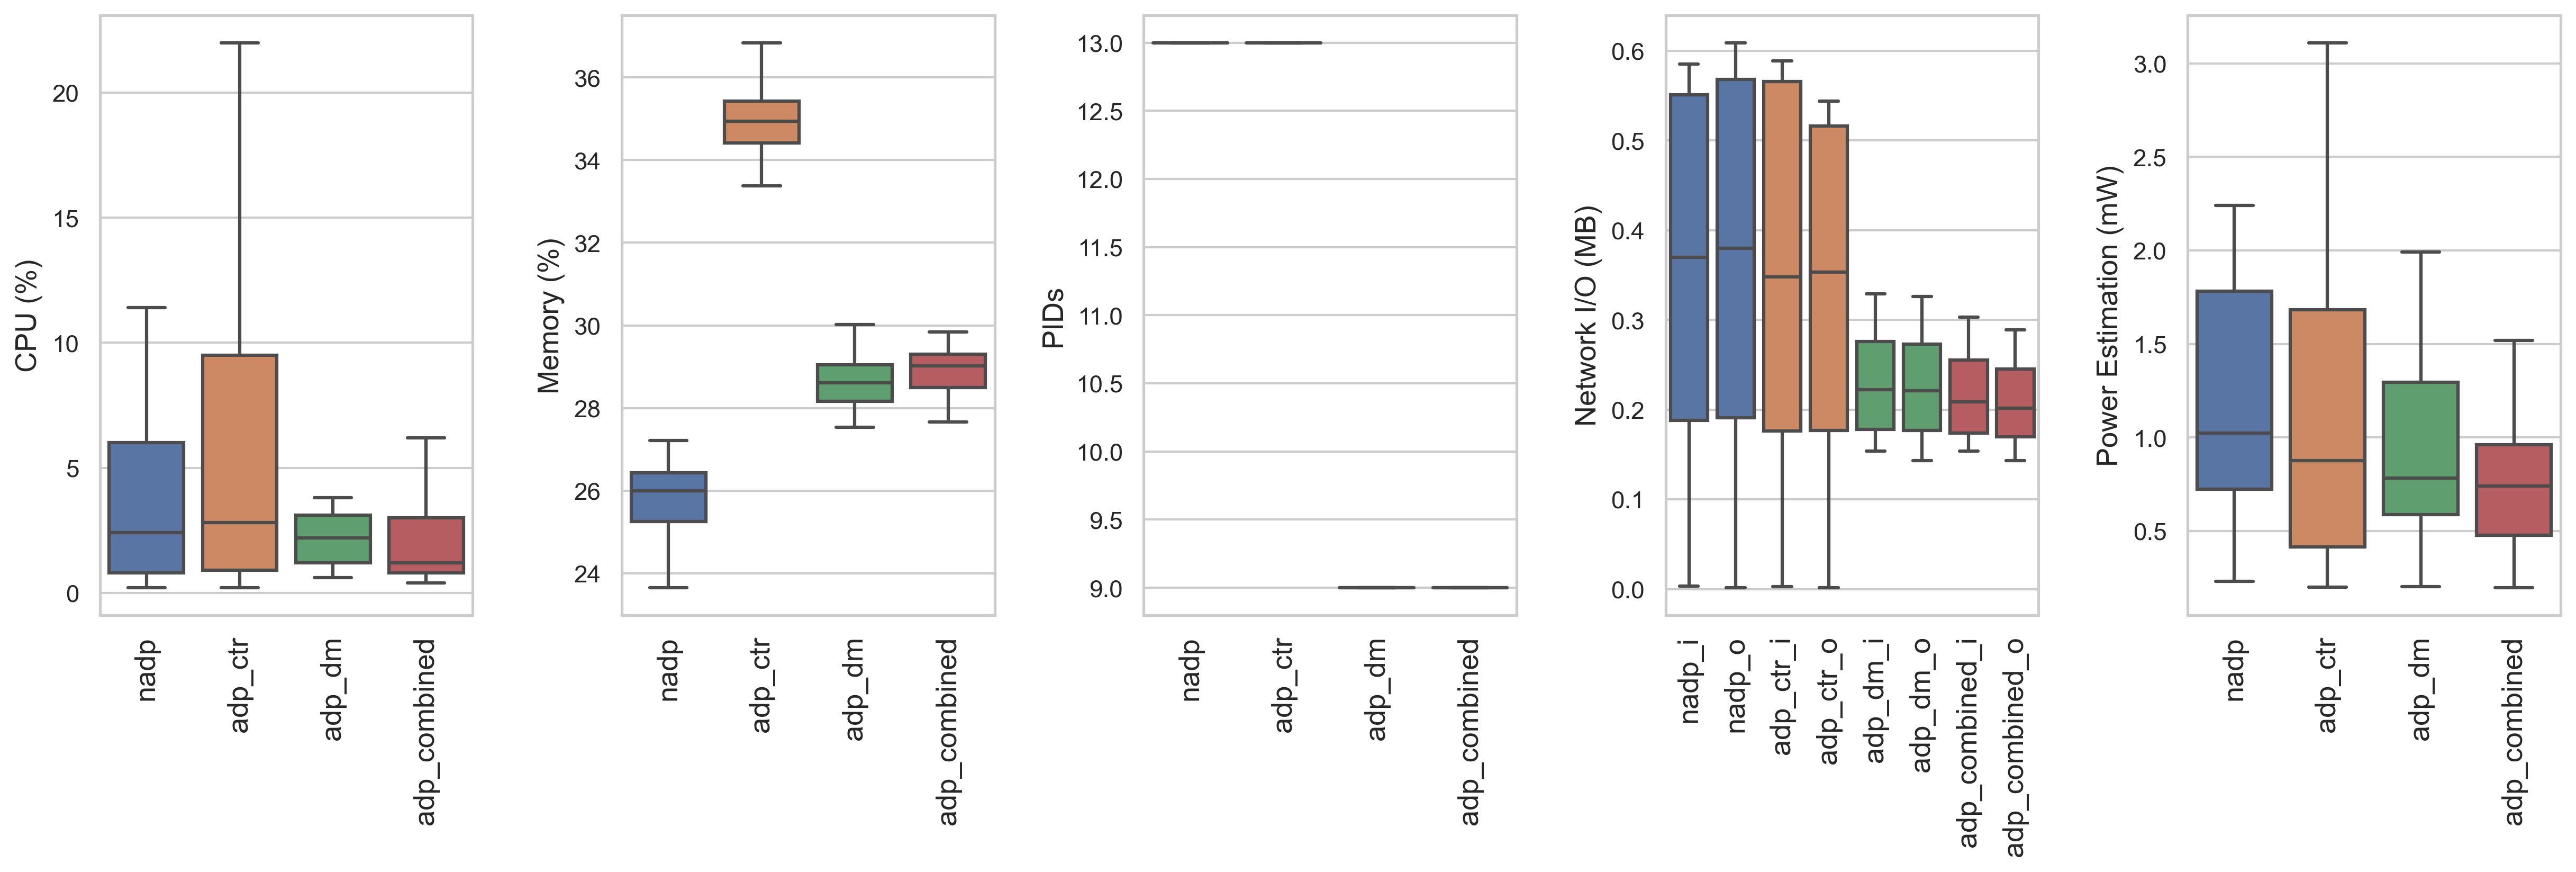

In [96]:
f = plt.figure(figsize=(20,5), dpi=300)

gs = gridspec.GridSpec(1, 5)

colors = [sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[3]]
              
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
ax5 = plt.subplot(gs[4])

# ax1.legend(["Non-Adaptive", "Adaptive CTR", "Adaptive DM", "Adaptive Combined"], loc="upper right", prop={'size': 10})
ax1.set_ylabel('CPU (%)', fontsize=13)
ax1.set_xticklabels(['Baseline', 'Adaptive CTR', 'Adaptive DM', 'Adaptive Combined'], rotation=90, fontsize=13)
ax2.set_ylabel('Memory (%)', fontsize=13)
ax2.set_xticklabels(['Baseline', 'Adaptive CTR', 'Adaptive DM', 'Adaptive Combined'], rotation=90, fontsize=13)
ax3.set_ylabel('PIDs', fontsize=13)
ax3.set_xticklabels(['Baseline', 'Adaptive CTR', 'Adaptive DM', 'Adaptive Combined'], rotation=90, fontsize=13)
ax4.set_ylabel('Network I/O (MB)', fontsize=13)
ax4.set_xticklabels(['Baseline I', 'Baseline O', 'Adaptive CTR I', 'Adaptive CTR O', 'Adaptive DM I', 'Adaptive DM O', 'Adaptive Combined I', 'Adaptive Combined O'], rotation=90, fontsize=13)
ax5.set_ylabel('Power Estimation (mW)', fontsize=13)
ax5.set_xticklabels(['Adaptive CTR', 'Adaptive DM', 'Adaptive Combined', 'Baseline'], rotation=90, fontsize=13)

sns.boxplot(data=df_cpu.mask(df_cpu == 0.0), ax=ax1, palette=colors, showfliers=False);
sns.boxplot(data=df_mem, ax=ax2, palette=colors, showfliers=False);
sns.boxplot(data=df_pids, ax=ax3, palette=colors, showfliers=False);

colors_net = [sns.color_palette()[0], sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[2], sns.color_palette()[3], sns.color_palette()[3]]
sns.boxplot(data=df_netio, ax=ax4, palette=colors_net, showfliers=False);

sns.boxplot(data=df_battery, ax=ax5, palette=colors, showfliers=False);

plt.subplots_adjust(wspace=0.4)
plt.savefig("graphs/Fullboxplot_Efficiency.pdf",bbox_inches='tight')

In [19]:
df_battery.mean()

nadp            6.886455
adp_ctr         7.535911
adp_dm          8.433535
adp_combined    8.000408
dtype: float64